In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew
from subprocess import check_output

import warnings
warnings.filterwarnings('ignore')


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train)
print(train.columns)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [4]:
print(test)
print(test.columns,len(test.columns))

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [5]:
print("The train data size before dropping Id feature is : {}".format(train.shape))
print("The test data size before dropping Id feature is: {}".format(test.shape))

train_ID=train['Id']
test_ID=test['Id']

train.drop(["Id"],axis=1,inplace=True)
test.drop(["Id"],axis=1,inplace=True)
print("The train data size after dropping Id feature is : {}".format(train.shape))
print("The test data size after dropping Id feature is: {}".format(test.shape))


The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is: (1459, 80)
The train data size after dropping Id feature is : (1460, 80)
The test data size after dropping Id feature is: (1459, 79)


## Data Processing
### Outliers

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

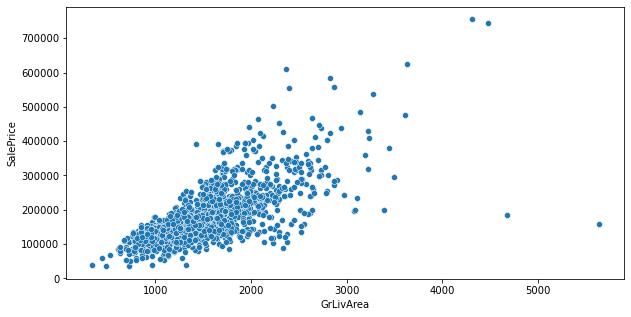

In [6]:
f,ax=plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice)

In [7]:
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

## Target Variable

(180932.91906721535, 79467.78892987774)


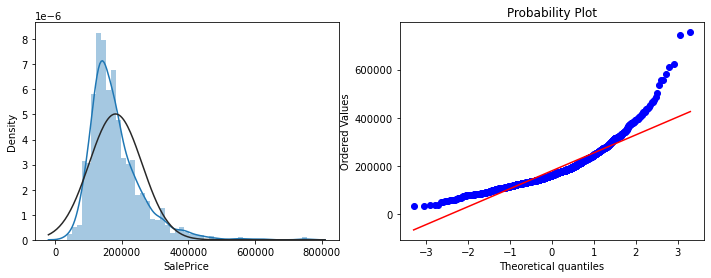

In [8]:
f,ax=plt.subplots(1,2,figsize=(12,4))
sns.distplot(train.SalePrice,fit=norm,ax=ax[0])
stats.probplot(train.SalePrice,plot=ax[1])
print(norm.fit(train.SalePrice))

## Log Transformation of the target variable


 mu = 12.02 and sigma = 0.40



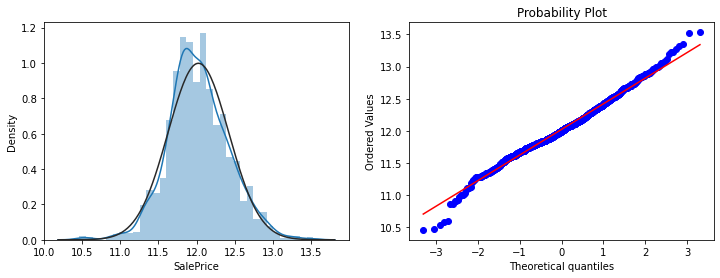

In [9]:
train['SalePrice']=np.log1p(train['SalePrice'])
f,ax=plt.subplots(1,2,figsize=(12,4))
sns.distplot(train['SalePrice'],fit=norm,ax=ax[0])
(mu,sigma)=norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
res=stats.probplot(train['SalePrice'],plot=ax[1])

## Feature Engineering

In [10]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train['SalePrice'].values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print("All_data size is : {}".format(all_data.shape))
print(f"ntrain:{ntrain}, ntest:{ntest}")

All_data size is : (2917, 79)
ntrain:1458, ntest:1459


### Missing Data

In [11]:
all_datat_na=all_data.isnull().sum()/all_data.shape[0]
missing_data=pd.DataFrame({"Missing Rate":all_datat_na})
missing_data[missing_data['Missing Rate']>0].sort_values(['Missing Rate'],ascending=False)[:10]

,Missing Rate
PoolQC,0.996915
MiscFeature,0.964004
Alley,0.932122
Fence,0.804251
FireplaceQu,0.486802
LotFrontage,0.166610
GarageFinish,0.054508
GarageQual,0.054508
GarageCond,0.054508
GarageYrBlt,0.054508


### Data Correlation

<AxesSubplot:>

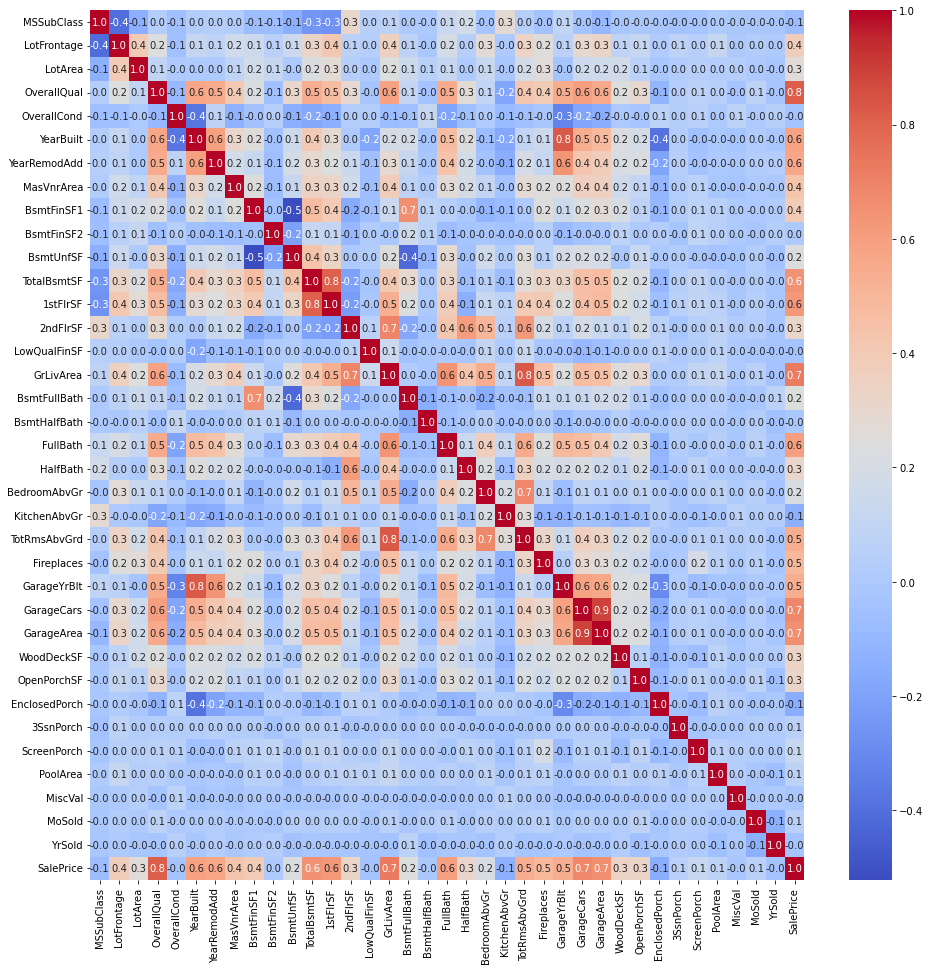

In [12]:
corr=train.corr()
plt.subplots(figsize=(16,16))
# sns.heatmap(corrmat,vmax=0.9,square=True)
sns.heatmap(corr,annot=True, fmt='.1f',cmap="coolwarm")

Inputing Missing Values

In [13]:
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")

In [14]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [15]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [16]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [17]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [18]:
all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

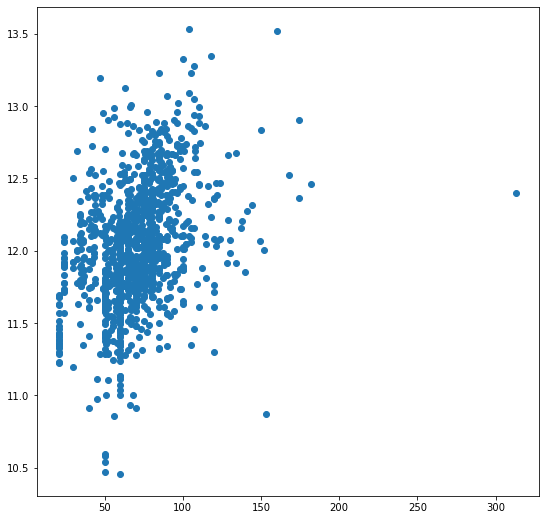

In [19]:
f,ax=plt.subplots(1,1,figsize=(9,9))
ax=plt.scatter(x=train["LotFrontage"],y=train["SalePrice"])
plt.show()

In [20]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [21]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [22]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [23]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [24]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [25]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [26]:
all_data = all_data.drop(['Utilities'], axis=1)

In [27]:
all_data["Functional"].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [28]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [29]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [30]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [31]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [32]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [33]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [34]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [35]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [36]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    all_data[c] = lbl.fit_transform(list(all_data[c].values)) 

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [37]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [38]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [39]:
all_data=pd.get_dummies(all_data)

In [40]:
train = all_data[:ntrain]
test = all_data[ntrain:]
X=train.values
y=y_train

# Models

# ensenble

In [41]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold

In [42]:
random_state = 2

regressors = []
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state),random_state=random_state,learning_rate=0.1))
regressors.append(RandomForestRegressor(random_state=random_state))
regressors.append(GradientBoostingRegressor(random_state=random_state))
regressors.append(ExtraTreesRegressor(random_state=random_state))
# regressors.append(MLPRegressor(random_state=random_state))
regressors.append(KNeighborsRegressor())
regressors.append(xgb.XGBRegressor())
regressors.append(lgb.LGBMRegressor())


In [43]:
#Validation function
n_folds = 5
   
cv_results = []
cv=KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
for model in regressors :
    cv_results.append(np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = cv)))

In [44]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

   CrossValMeans  CrossValerrors         Algorithm
0       0.141538        0.005625          AdaBoost
1       0.138503        0.003382      RandomForest
2       0.121234        0.006524  GradientBoosting
3       0.127186        0.008328        ExtraTrees
4       0.217728        0.006253       KNeighboors
5       0.131057        0.007651           XGBoost
6       0.127506        0.005069              LGBM


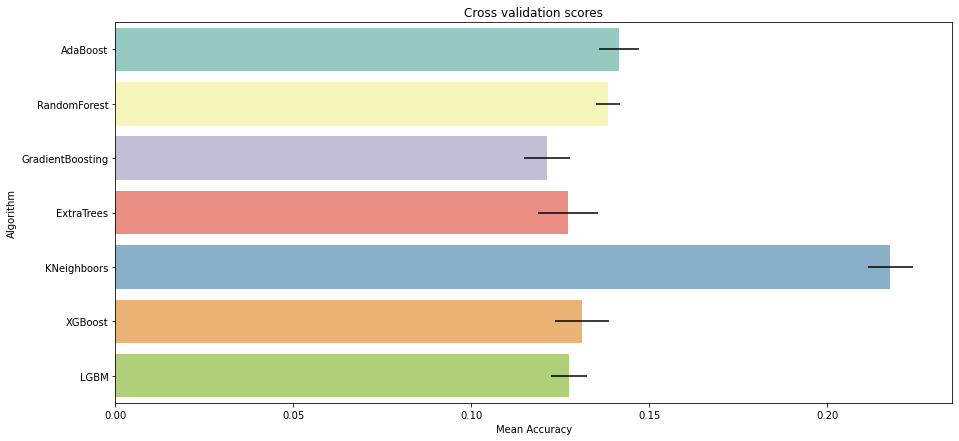

In [45]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["AdaBoost",
"RandomForest","GradientBoosting","ExtraTrees","KNeighboors","XGBoost","LGBM"]})

f,ax=plt.subplots(1,1,figsize=(15,7))
ax.set(xlabel='common xlabel', ylabel='common ylabel')
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std},ax=ax)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

In [46]:
RFC = RandomForestRegressor()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300,500]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRFC.fit(X,y)
RFC_best = gsRFC.best_estimator_

# Best score
np.sqrt(-gsRFC.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


0.13645337543799899

In [47]:
# Gradient boosting tunning
GBC = GradientBoostingRegressor()
gb_param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3,6,9]
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X,y)
GBC_best = gsGBC.best_estimator_

# Best score
np.sqrt(-gsGBC.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.12003736375991314

In [48]:
# XGBoost
XGBR = xgb.XGBRegressor()
xgb_param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
 
gsXGBC = GridSearchCV(XGBR,param_grid = xgb_param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)

gsXGBC.fit(X, y)  
XGBC_best = gsXGBC.best_estimator_

# Best score
np.sqrt(-gsXGBC.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[21:11:31] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


0.115398420018225

In [49]:
# LGBM
LGBMR = lgb.LGBMRegressor()
lgbm_param_grid = {
    'num_leaves': [11, 21, 31, 41],
    'learning_rate': [.03, 0.05, .07, .1],
    'n_estimators': [100, 200, 300],
}
 
gsLGBM = GridSearchCV(LGBMR,param_grid = lgbm_param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)

gsLGBM.fit(X, y)  
LGBM_best = gsLGBM.best_estimator_

# Best score
np.sqrt(-gsLGBM.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


0.1212974890368593

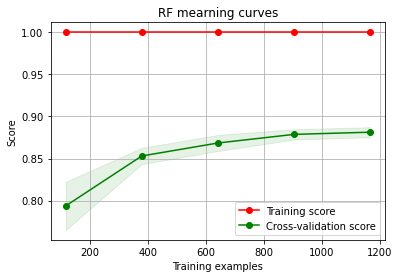

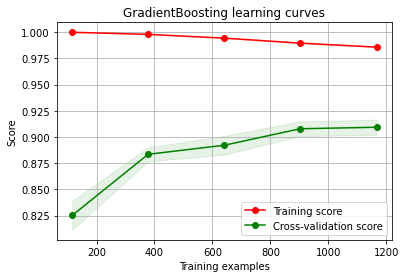

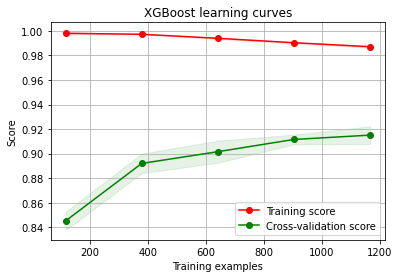

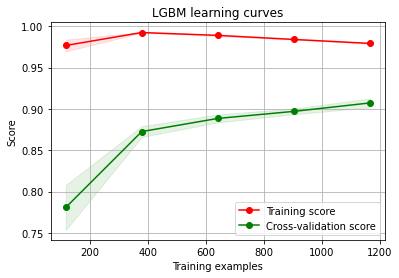

In [50]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X,y,cv=cv)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X,y,cv=cv)
g = plot_learning_curve(gsXGBC.best_estimator_,"XGBoost learning curves",X,y,cv=cv)
g = plot_learning_curve(gsLGBM.best_estimator_,"LGBM learning curves",X,y,cv=cv)

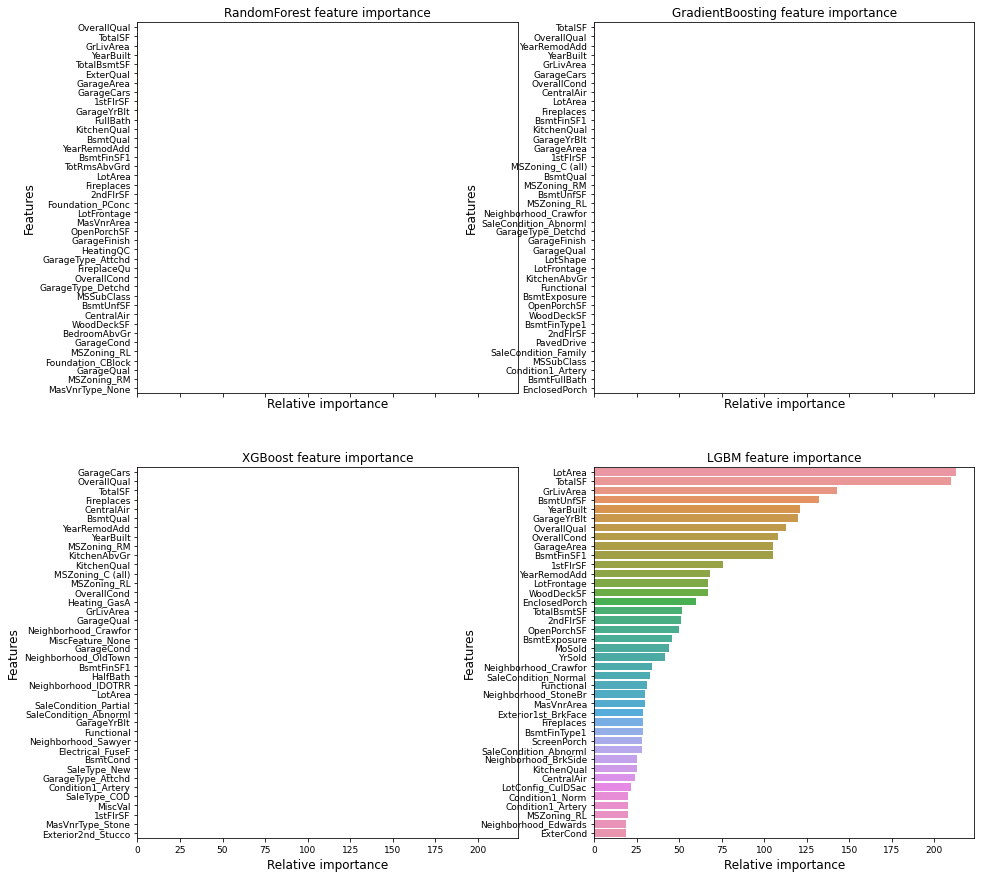

In [51]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("RandomForest",RFC_best),("GradientBoosting",GBC_best),("XGBoost",XGBC_best),("LGBM", LGBM_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [53]:
pred1=gsRFC.best_estimator_.predict(test.values)
pred2=gsGBC.best_estimator_.predict(test.values)
pred3=gsXGBC.best_estimator_.predict(test.values)
pred4=gsLGBM.best_estimator_.predict(test.values)


pred1=np.expm1(pred1)
pred2=np.expm1(pred2)
pred3=np.expm1(pred3)
pred4=np.expm1(pred4)

In [62]:
sub=pd.DataFrame({"Id":test_ID,"pred1":pred1,"pred2":pred2,"pred3":pred3,"pred4":pred4})
sub["SalePrice"]=sub.pred1*0.2+sub.pred1*0.2+sub.pred1*0.4+sub.pred4*0.2

In [64]:
sub[["Id","SalePrice"]].to_csv("submission_220529.csv",index=False)

# stacking

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [ ]:
#Validation function
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0038 (0.0004)



In [ ]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0037 (0.0004)



In [ ]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0205 (0.0068)



c:\Users\ipofr\anaconda3\envs\tch3.8\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.18209e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\ipofr\anaconda3\envs\tch3.8\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.84922e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\ipofr\anaconda3\envs\tch3.8\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.65078e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\ipofr\anaconda3\envs\tch3.8\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=6.37143e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
c:\Users\ipofr\anaconda3

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0027 (0.0002)



In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[15:46:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:46:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

In [ ]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
model_xgb.fit(train, y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y, xgb_train_pred))

[15:50:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.008596298239980572


In [ ]:
model_lgb.fit(train, y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y, lgb_train_pred))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
0.0016299287703716813


In [ ]:
print('RMSLE score on train data:')
print(rmsle(y, xgb_train_pred*0.5 + lgb_train_pred*0.5 ))